# USER BEHAVIOR ANALYTICS

# Section #1 Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/Kiroha/Jupyter/User behavior sample 2.csv')
df = df.iloc[:,2:]
df.head()

,Status,OrderDate,OrderTime,ASAP,DeliveredTime,CompletionTime,Distance,RestaurantID,TotalItem,Order Value,TotalDiscount,PaymentMethod,DeviceOSType,AppType,Category
0,Delivered,5/1/2018,13:07:46,True,5/1/2018 14:44,96.817067,6.2,141966,4,222000,0,Cash,Web,Foody,"[Food, Lunch]"
1,Delivered,5/30/2018,13:09:14,True,5/30/2018 13:42,33.700000,6.2,141966,2,165000,0,Cash,Web,Foody,"[Food, Lunch]"
2,Delivered,5/29/2018,14:51:52,True,5/29/2018 15:24,32.150000,6.2,141966,2,190500,0,Cash,Web,Foody,"[Food, Lunch]"
3,Delivered,5/2/2018,11:06:15,True,5/2/2018 12:01,54.972550,8.7,1630,6,213000,0,Cash,Web,Foody,[Food]
4,Delivered,5/4/2018,18:35:37,True,5/4/2018 19:39,63.697100,4.0,7924,6,202500,0,Cash,iOS,Foody,"[Food, Lunch]"


# Overall Summary

In [3]:
print("Number of order: ", df['OrderTime'].count())
print("Total order value: ", df['Order Value'].sum())
print("Total ordered items: ", df['TotalItem'].sum())
print("Total discounted value: ",df['TotalDiscount'].sum())
print("Average of completion time: " + str(round(df['CompletionTime'].mean(), 3)) + " minutes")
print("Average delivery distance: " + str(round(df['Distance'].mean(), 2)) + " km")
print("Average order value: " + "{0:n}".format(round(df['Order Value'].mean()),2))
print("Order cancelation rate: " + str(round(df[df['Status'] == 'Cancel']['Status'].count() / df['Status'].count()*100, 2)) + "%")

Number of order:  634
Total order value:  132485400
Total ordered items:  3137
Total discounted value:  5780740
Average of completion time: 47.832 minutes
Average delivery distance: 3.12 km
Average order value: 208968
Order cancelation rate: 12.62%


# Key Metrics:

1. DISCOUNTED PERCENT

In [4]:
DC = df[df['TotalDiscount']>0]
DOP = len(DC) / len(df) *100
print('Discounted Order Percent: ', DOP, '%')

Discounted Order Percent:  29.179810725552052 %


29.2% of orders were given at discounted price

In [5]:
DP = df.TotalDiscount.sum() / DC['Order Value'].sum() *100
print('Discounted Value Percent (Discounted order only): ', DP, '%')

Discounted Value Percent (Discounted order only):  13.738642710301473 %


In [6]:
DP_all = df.TotalDiscount.sum() / df['Order Value'].sum() *100
print('Discounted Value Percent (Overall): ', DP_all, '%')

Discounted Value Percent (Overall):  4.363303428151329 %


Total money loss for discounted order is 5780740 (4.36% overall)

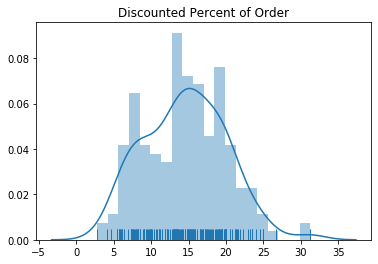

In [7]:
DPV = df['Discounted_Perc_Value'] = df['TotalDiscount'] / df['Order Value'] *100
sns.distplot(DPV[DPV>0], kde=True, rug=True, bins=20).set_title('Discounted Percent of Order')
plt.show()

In [8]:
np.percentile(DPV[DPV>0], [5, 25, 50, 75, 95])
# the 5th, 25th, 50th, 75th, 95th value of discounted percent of order value

array([ 5.92710985, 10.        , 14.81481481, 18.70512821, 23.37713267])

The 25th value of discounted percent of order value is 10% => 75% of discounted order have at least 10% discount \
The median (50th) value is 14.8% => Most order have 14-15% discount

2. Share of app type

In [9]:
# Compare "Foody" with "Now" (AppType)
AT = df['AppType'].value_counts(ascending=False)
AT

Now      429
Foody    205
Name: AppType, dtype: int64

In [10]:
ATP = df.groupby('AppType')['Order Value'].sum().sort_values(ascending=False)
ATP

AppType
Now      92843250
Foody    39642150
Name: Order Value, dtype: int64

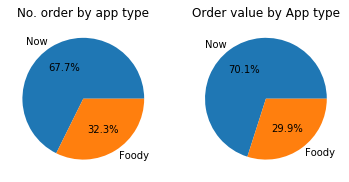

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
labels=['Now','Foody']

ax1.pie(AT,  labels=labels, autopct='%1.1f%%')
ax1.set_title('No. order by app type')

ax2.pie(ATP, labels=labels, autopct='%1.1f%%')
ax2.set_title('Order value by App type')
plt.show()

Customer prefer Now better than Foody => budget for marketing should prioritize Now app.

3. Share of used devices for service

In [12]:
# Compare Devices
DOT = df['DeviceOSType'].value_counts(ascending=False)
DOT

iOS        367
Android    166
Web        101
Name: DeviceOSType, dtype: int64

In [13]:
DOT_V = df.groupby('DeviceOSType')['Order Value'].sum().sort_values(ascending=False)
DOT_V

DeviceOSType
iOS        73605900
Android    29481750
Web        29397750
Name: Order Value, dtype: int64

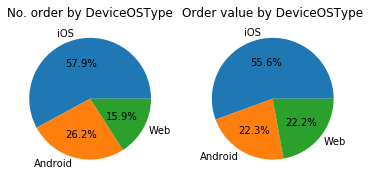

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2)
labels2=['iOS','Android', 'Web']

ax1.pie(DOT,  labels=labels2, autopct='%1.1f%%')
ax1.set_title('No. order by DeviceOSType')

ax2.pie(DOT_V, labels=labels2, autopct='%1.1f%%')
ax2.set_title('Order value by DeviceOSType')
plt.show()

58% of order were given from iOS devices and 55.6% revenue came from them => Customer with iOS devices seems to have higher income, we should bring them more deal

4. Payment Method

In [15]:
PMT = DOT_V = df.groupby('PaymentMethod')['Order Value'].sum().sort_values(ascending=False)
PMT

PaymentMethod
Cash                108948150
External(Airpay)     16147500
VNPay                 4039500
Credit                2435250
PayNow                 915000
Name: Order Value, dtype: int64

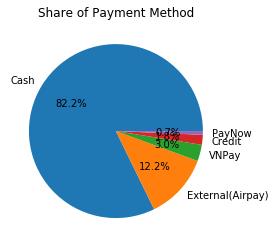

In [16]:
labels3 = PMT.index
plt.pie(PMT, labels=labels3, autopct='%1.1f%%')
plt.title('Share of Payment Method')
plt.show()

The majority of customer pay in cash because it is very convenient and safe. And in case the food or drink don't come as they expect, they can protect their rights. \
But we should keep an eye on Airpay. With proper promotion, it can be strong payment method in the 4.0 era.

5. Day and time of order

In [17]:
DT = pd.to_datetime(df['DeliveredTime'])
df['day_of_week'] = DT.dt.weekday_name
df['order_hour']  = DT.dt.hour

In [18]:
DOW = df['day_of_week'].value_counts(ascending=False)
DOW

Thursday     98
Wednesday    92
Friday       90
Tuesday      82
Monday       69
Sunday       62
Saturday     61
Name: day_of_week, dtype: int64

In [19]:
df.groupby('day_of_week')['Order Value'].sum().sort_values(ascending=False)

day_of_week
Wednesday    17906550
Thursday     17382000
Friday       17208000
Tuesday      16869750
Monday       15843000
Sunday       15582600
Saturday     13746000
Name: Order Value, dtype: int64

Customers tend to order more on Wednesday, Thursday and Friday. Can guess they are fellow colleagues or schoolmate and want to order something to eat together before separation on weekends


In [20]:
DOW = df['order_hour'].value_counts(ascending=False)
DOW.head(10)

12.0    94
13.0    82
14.0    49
18.0    47
19.0    42
21.0    41
17.0    40
20.0    37
15.0    33
16.0    31
Name: order_hour, dtype: int64

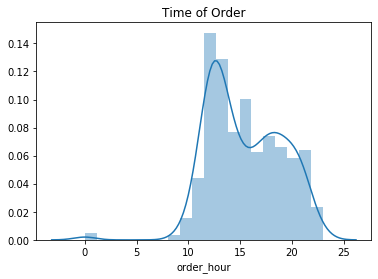

In [22]:
sns.distplot(df['order_hour'], kde=True, bins=20).set_title('Time of Order')
plt.show()

The rush hour is from 12:00 to 14:00

In [23]:
rush_hour = df['order_hour'].value_counts(ascending=False).iloc[0:3].sum() / df['order_hour'].value_counts(ascending=False).sum() *100
rush_hour

40.61371841155235

40.6% orders of the whole day were made during rush hour.

6. Category of order

            count
Category         
Food          614
Lunch         294
Drink          25
Streetfood     20
Dessert         3


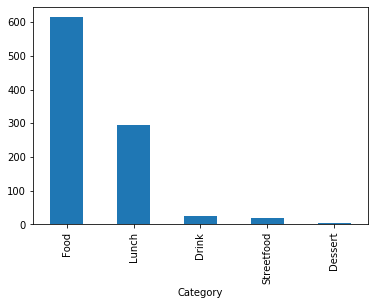

In [24]:
categoryName = ['Food', 'Lunch', 'Drink', 'Streetfood', 'Dessert']
categoryCount = [0]*5
for type in df['Category']:
    if('Food' in type):
        categoryCount[0] += 1
    if('Lunch' in type):
        categoryCount[1] += 1
    if('Drink' in type):
        categoryCount[2] += 1
    if('Streetfood' in type):
        categoryCount[3] += 1
    if('Dessert' in type):
        categoryCount[4] += 1
Category = pd.DataFrame({'Category': categoryName, 'count': categoryCount})
Category = Category.set_index('Category')
print(Category)

Category['count'].plot(kind='bar')
plt.show()

# Top users in terms of GMV

By the analysis above, we can presume about top users:
1. Prefer Now better than Foody
2. Use iOS devices
3. Pay in cash
4. Order from 12:00 to 15:00
5. Order on Wednesday, Thursday and Friday
6. Order food, lunch

# Section #2 - Data Analysis - Predictions

Based on the data analysis above, some action can be taken to drive business forward:
    1. Bring high value food, lunch deal to users on Wed, Thur and Fri during noon time.
    2. Promote Now app on iOS devices better.

# Section #3 - Data Analysis - Business Insights

Key insights that can be used to make impactful business decisions:
    1. Time in day of order
    2. Day in week of order
    3. The used platform

# Section #4 - SQL

Query show the total order value and average basket size segmented by AppType:

SELECT AppType, SUM('Order Value'), AVG('Order Value')

FROM User_Behavior_Sample_2

GROUP BY AppType